# **Coronamusic**

In [55]:
import numpy as np, pandas as pd, os, sys, itertools, re, seaborn as sns, warnings, matplotlib.pyplot as plt, statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
plt.rcParams['figure.figsize'] = (14,4)
warnings.filterwarnings(action='ignore')
%run Coronavirus_Music_Functions.ipynb

In [129]:
data = pd.read_csv('cleaned_data.csv')
data.shape

(5113, 234)

In [130]:
# delete people who didn't answer coronamusic questions
data = data.rename(columns={"Music Engagement_Interest in Others Music": "Coronamusic",
                            "Country_Country Name":"Country",
                            "Demographics_General_Gender_binary":'Gender'
                           })
data = data.dropna(subset=['Coronamusic'])
data = data.drop(columns=['Demographics_General_Gender']).reset_index(drop = True)
data.shape

(4857, 233)

In [131]:
# impute by country
demographics = [col for col in data.columns if 'Demographics_' in col]
normalize_column = 'Country'

for i, column in enumerate(demographics):
    data[column] = data.groupby(normalize_column, sort = False)[column].apply(lambda x: x.fillna(x.median()))
    
data.reset_index(inplace = True, drop = True)
data.shape

(4857, 233)

In [132]:
# make binary columns
data['Demographics_General_Employed Binary'] = 0
data['Demographics_General_Employed Binary'] = np.where( (data['Demographics_General_Employement Before COVID-Employed Full Time']==1)
                                                            | (data['Demographics_General_Employement Before COVID-Employed Part Time']==1) 
                                                            | (data['Demographics_General_Employement Before COVID-Self Employed']==1),
                                                            1, data['Demographics_General_Employed Binary'])

data['Demographics_COVID_Living With Others Binary'] = 1
data['Demographics_COVID_Living With Others Binary'] = np.where( (data['Demographics_COVID_Living Situation-No Response']==1)
                                                            | (data['Demographics_COVID_Living Situation-Pet']==1) 
                                                            | (data['Demographics_COVID_Living Situation-Alone']==1),
                                                            0, data['Demographics_COVID_Living With Others Binary'])

data['Demographics_General_Suburban Binary'] = 0
data['Demographics_General_Suburban Binary'] = np.where( (data['Demographics_General_City Type-Suburban']==1),
                                                   1, data['Demographics_General_Suburban Binary'])

In [133]:
cols = ['Coronamusic','Country','ID'] + demographics
data = data[cols].reset_index(drop=True)

# remove prefixes
data.columns = data.columns.str.replace(r'^.*Demographics_', '')
data.columns = data.columns.str.replace(r'^.*General_', '')
data.columns = data.columns.str.replace(r'^.*Health_', '')
data.columns = data.columns.str.replace(r'^.*Music_', '')
data.columns = data.columns.str.replace(r'^.*Personality_', '')
data.columns = data.columns.str.replace(r'^.*COVID_', '')

# drop
drop_cols = [c for c in data.columns if '-' in c]+['Bored','ID']
X = data.drop(columns=drop_cols).reset_index(drop=True)

In [134]:
c = X.Country.astype('category')
country_dict = dict(enumerate(c.cat.categories))

X['Country'] = X.Country.astype('category').cat.codes

In [85]:
y = data.pop('Coronamusic')
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Coronamusic   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.451e+30
Date:                Thu, 24 Dec 2020   Prob (F-statistic):               0.00
Time:                        07:20:55   Log-Likelihood:             1.4551e+05
No. Observations:                4857   AIC:                        -2.910e+05
Df Residuals:                    4832   BIC:                        -2.908e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.935e-14   4.22e-15     11.685      0.000    4.11e-14    5.76e-14
Coronamusic              1.0000   2.05e-16   4.87e+15      0.000       1.000       1.000
Country               -1.82e-15   2.11e-16     -8.625      0.000   -2.23e-15   -1.41e-15
Current Place Home    4.385e-15   1.81e-15      2.417      0.016    8.29e-16    7.94e-15
Number Times Leave    9.021e-16   7.93e-17     11.373      0.000    7.47e-16    1.06e-15
Work Changed Binary  -3.192e-15   7.26e-16     -4.397      0.000   -4.62e-15   -1.77e-15
Age                   2.044e-16   2.31e-17      8.829      0.000    1.59e-16     2.5e-16
Education Years       -6.05e-16   5.97e-17    -10.142      0.000   -7.22e-16   -4.88e-16
Anxious              -8.014e-16    3.6e-16     -2.227      0.026   -1.51e-15   -9.59e-17
Arousal               8.847e-16   3.18e-16      2.783      0.005    2.62e-16    1.51e-15
COVID Contact Binary  1.804e-16   8.38e-16      0.215      0.829   -1.46e-15    1.82e-15
Depressed            -1.416e-15   3.38e-16     -4.183      0.000   -2.08e-15   -7.52e-16
General Health       -2.776e-17   3.33e-16     -0.083      0.934   -6.81e-16    6.26e-16
Lonely               -1.197e-15   2.92e-16     -4.100      0.000   -1.77e-15   -6.25e-16
Negative Valence     -9.923e-16   3.56e-16     -2.788      0.005   -1.69e-15   -2.95e-16
Positive Valence      6.028e-16   3.25e-16      1.853      0.064   -3.48e-17    1.24e-15
Stressed             -1.282e-15   3.49e-16     -3.678      0.000   -1.97e-15   -5.99e-16
Music Importance     -3.469e-16   2.64e-16     -1.316      0.188   -8.64e-16     1.7e-16
Number of Concerts    8.674e-17   2.42e-16      0.358      0.720   -3.88e-16    5.61e-16
Ollen                -2.325e-16   3.83e-16     -0.607      0.544   -9.83e-16    5.18e-16
Agreeableness         4.649e-16   3.35e-16      1.389      0.165   -1.91e-16    1.12e-15
Conscientiousness     1.735e-18   3.24e-16      0.005      0.996   -6.33e-16    6.37e-16
Extraversion          5.655e-16   2.99e-16      1.890      0.059    -2.1e-17    1.15e-15
Neuroticism           3.469e-17   2.98e-16      0.116      0.907    -5.5e-16    6.19e-16
Openness               1.11e-16   3.16e-16      0.351      0.725   -5.09e-16    7.31e-16
==============================================================================
Omnibus:                       46.609   Durbin-Watson:                   0.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.281
Skew:                          -0.073   Prob(JB):                     9.78e-08
Kurtosis:                       2.628   Cond. No.                         657.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
cols = ['Anxious', 'Arousal', 'Depressed','General Health', 'Lonely', 'Negative Valence', 'Positive Valence', 'Stressed', 
        'Music Importance', 
        'Agreeableness', 'Conscientiousness', 'Extraversion', 'Neuroticism', 'Openness'
       ]

new = X[cols+['Country']]
new['Coronamusic'] = y

new['Country'] = new['Country'].map(country_dict)
new.columns

Index(['Anxious', 'Arousal', 'Depressed', 'General Health', 'Lonely',
       'Negative Valence', 'Positive Valence', 'Stressed', 'Music Importance',
       'Agreeableness', 'Conscientiousness', 'Extraversion', 'Neuroticism',
       'Openness', 'Country', 'Coronamusic'],
      dtype='object')

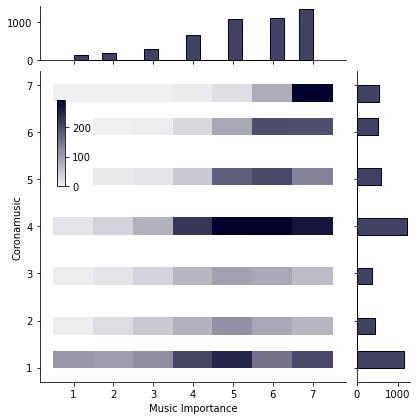

In [93]:
g = sns.JointGrid(data=new, x='Music Importance', y='Coronamusic', marginal_ticks=True)
cax = g.fig.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

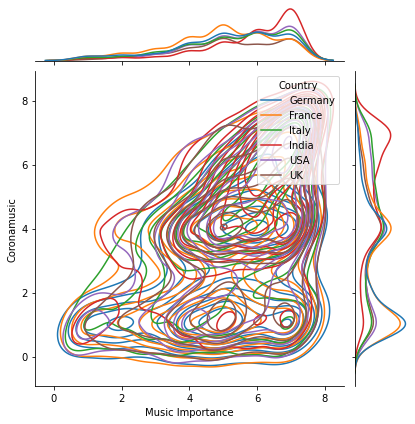

In [100]:
g = sns.jointplot(
    data=new,
    x="Music Importance", y="Coronamusic", hue="Country",
    kind="kde",
)

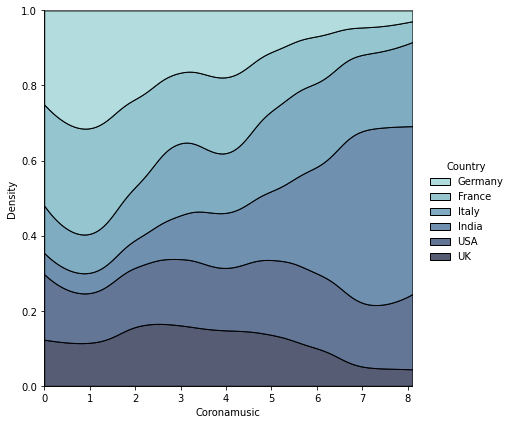

In [101]:
sns.displot(
    data=new,
    x="Coronamusic", hue="Country",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

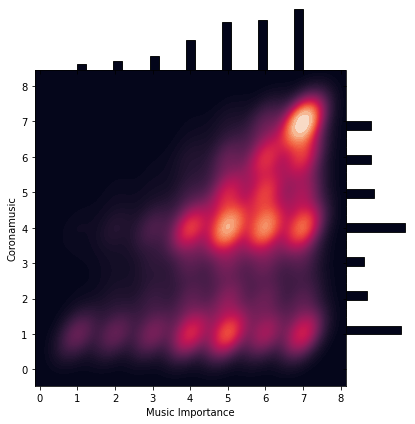

In [104]:
g = sns.JointGrid(data=new, x="Music Importance", y="Coronamusic", space=0)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

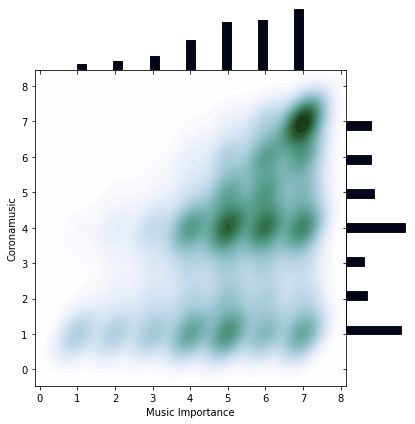

In [107]:
cmap = sns.cubehelix_palette(start=1.6666666666666665, light=1, as_cmap=True)

g = sns.JointGrid(data=new, x="Music Importance", y="Coronamusic", space=0)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=100, cmap=cmap)
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

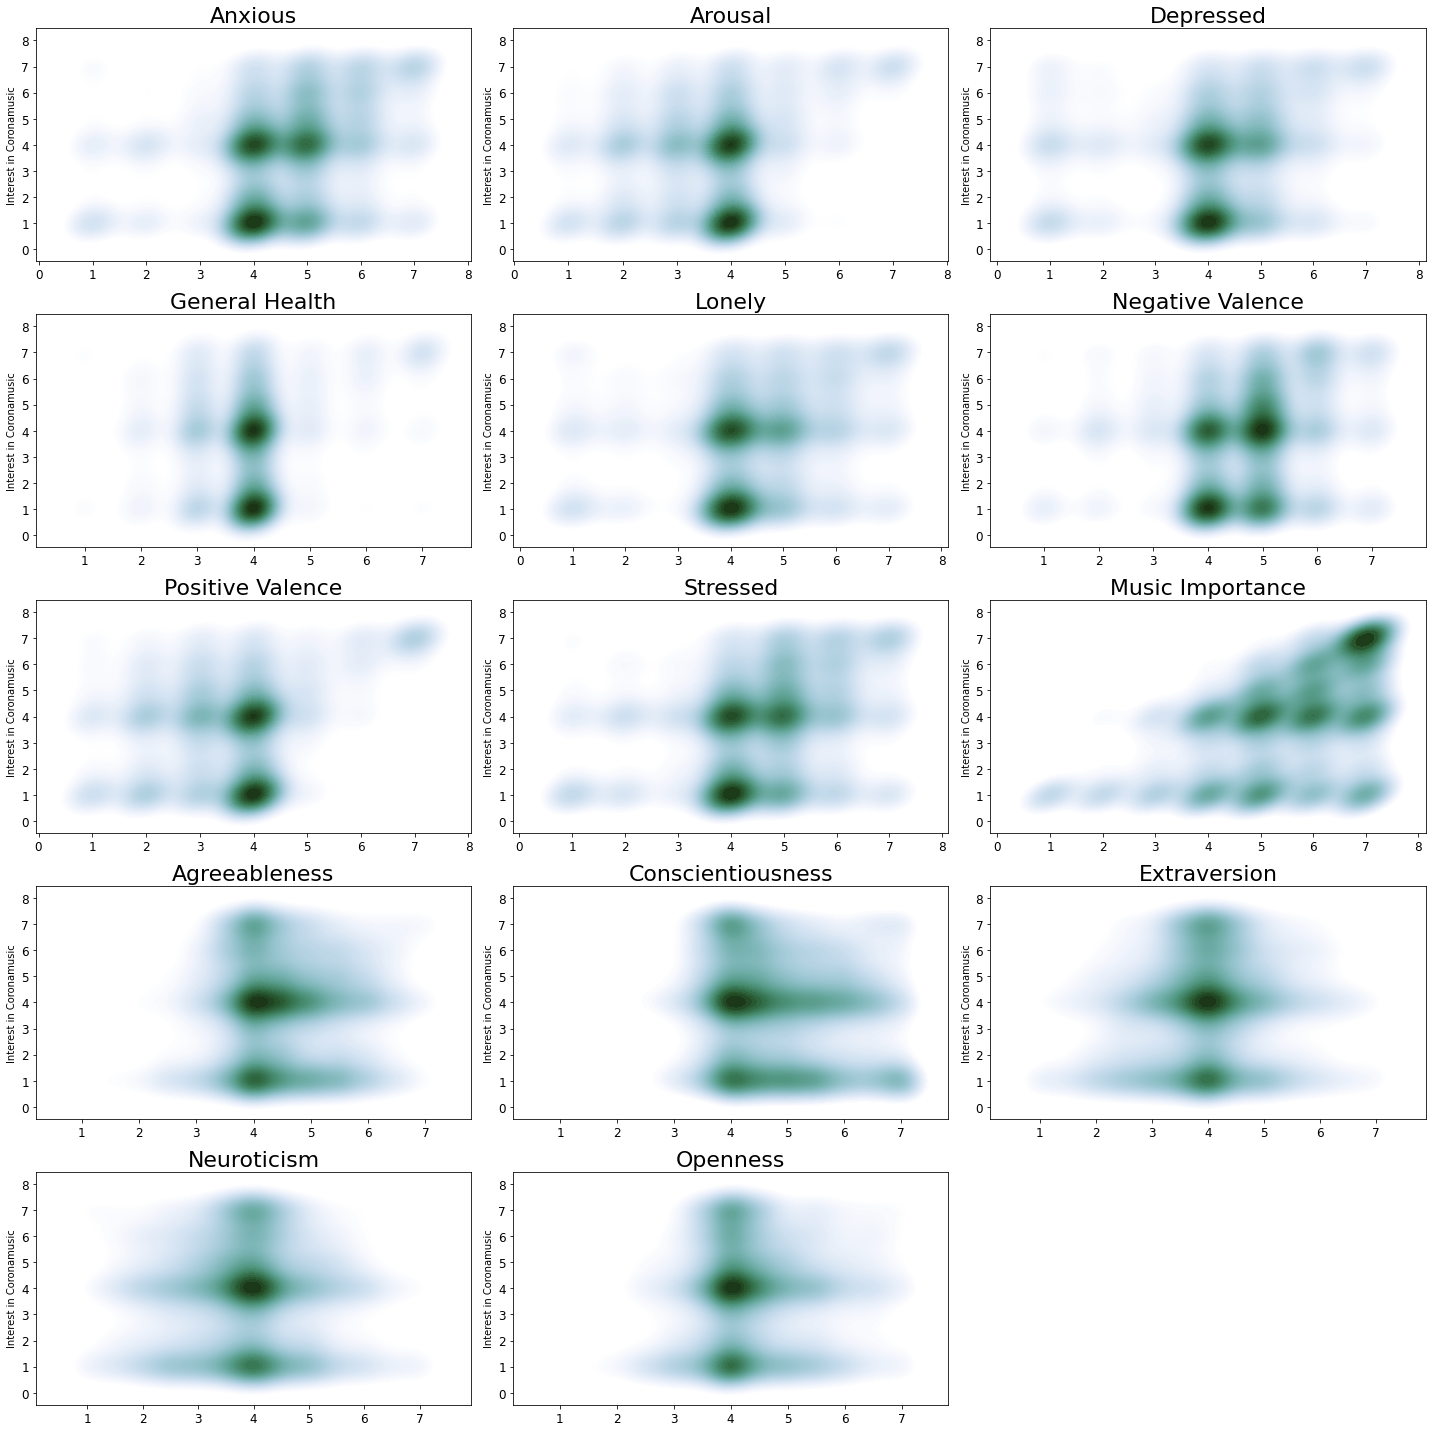

In [114]:
plt.figure(figsize=(20,20))
for i, column in enumerate(cols):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=new[column], y=new['Coronamusic'], cmap=cmap, fill=True, levels=100)
    plt.title(column, size = 22)
    plt.ylabel('Interest in Coronamusic')
    plt.xlabel('')
    plt.tight_layout()
    plt.tick_params(axis='both', which='major', labelsize=12)

In [157]:
[c for c in data.columns if c.startswith('Infected with COVID-')]

['Infected with COVID-I Am Infected',
 'Infected with COVID-I Am Mourning A Loss',
 'Infected with COVID-I Have Professional Contact',
 'Infected with COVID-I Live With Someone',
 'Infected with COVID-No Response',
 'Infected with COVID-None',
 'Infected with COVID-Prefer Not To Say',
 'Infected with COVID-Someone I Am Close To']

<AxesSubplot:xlabel='Coronamusic', ylabel='meh'>

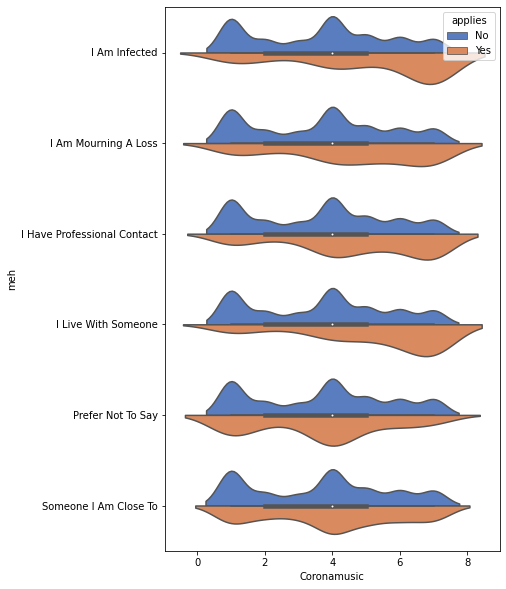

In [159]:
new = data[['ID']+[c for c in data.columns if c.startswith('Infected with COVID-')]]
new['Coronamusic'] = y
new.columns = new.columns.str.replace(r'^.*COVID-', '')

df_melt = pd.melt(new, id_vars=['ID','Coronamusic'], value_vars=['I Am Infected', 'I Am Mourning A Loss',
                                                   'I Have Professional Contact', 'I Live With Someone',
                                                   'Prefer Not To Say', 'Someone I Am Close To'],
                  var_name='meh', value_name='applies')
df_melt['applies'] = df_melt['applies'].replace({0: 'No', 1: 'Yes'})

plt.figure(figsize=(6,10))
sns.violinplot(x="Coronamusic", y="meh", hue="applies",
               data=df_melt, palette="muted", split=True)

In [161]:
[c for c in data.columns if 'Living' in c]

['Living Situation-Alone',
 'Living Situation-Child',
 'Living Situation-Elderly',
 'Living Situation-Friend',
 'Living Situation-No Response',
 'Living Situation-Other',
 'Living Situation-Parent',
 'Living Situation-Partner',
 'Living Situation-Pet',
 'Living Situation-Shared',
 'Living Situation-SibCous']

<AxesSubplot:xlabel='Coronamusic', ylabel='meh'>

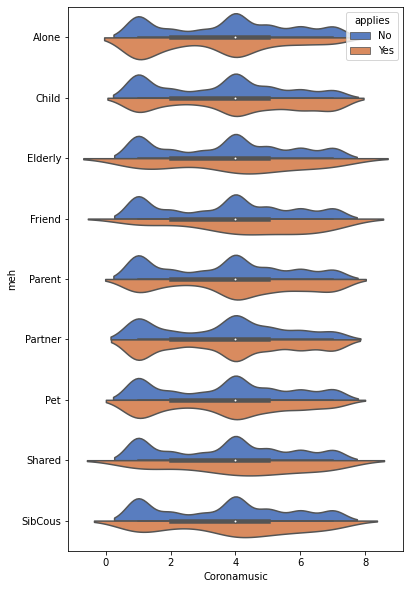

In [162]:
new = data[['ID']+[c for c in data.columns if c.startswith('Living Situation-')]]
new['Coronamusic'] = y
new.columns = new.columns.str.replace(r'^.*Situation-', '')

df_melt = pd.melt(new, id_vars=['ID','Coronamusic'], value_vars=['Alone','Child','Elderly','Friend',
                                                                 'Parent','Partner','Pet','Shared','SibCous'],
                  var_name='meh', value_name='applies')
df_melt['applies'] = df_melt['applies'].replace({0: 'No', 1: 'Yes'})

plt.figure(figsize=(6,10))
sns.violinplot(x="Coronamusic", y="meh", hue="applies",
               data=df_melt, palette="muted", split=True)